In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Isolation Forest

In [23]:
df = pd.read_csv("unsw_isolation2.csv")

In [24]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.900000,0.0,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
1,0.900000,0.0,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
2,0.900000,0.0,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667,0
3,0.900000,0.0,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
4,0.900000,0.0,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37823,0.853846,0.0,0.4,0.155355,0.144993,0.461602,0.781941,0.912327,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.016011,0.188733,0.0,0.666667,0
37824,0.853846,0.0,0.4,0.141755,0.137625,0.411463,0.446894,0.292001,0.444444,0.166667,...,0.0,0.012878,0.0,0.0,0.0,0.042485,0.095725,0.0,0.666667,0
37825,0.853846,0.0,0.4,0.055319,0.063025,0.281440,0.232378,0.876125,0.444444,0.166667,...,0.0,0.039355,0.0,0.0,0.0,0.050177,0.134101,0.0,0.666667,0
37826,0.853846,0.0,0.4,0.136957,0.129784,0.423802,0.736695,0.979109,0.444444,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.038544,0.130290,0.0,0.666667,0


In [25]:
X = df.drop('label', axis=1)
y = df['label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((30262, 42), (30262,))

### Apply ML

In [27]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [28]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=1)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3922
           1       1.00      1.00      1.00      3644

    accuracy                           1.00      7566
   macro avg       1.00      1.00      1.00      7566
weighted avg       1.00      1.00      1.00      7566



In [9]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_train,y_train,X_test,y_test)
print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7972

    accuracy                           1.00     15608
   macro avg       1.00      1.00      1.00     15608
weighted avg       1.00      1.00      1.00     15608



In [29]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 99.24
Testing  Accuracy: 99.01
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3922
           1       0.98      1.00      0.99      3644

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



In [11]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7972

    accuracy                           1.00     15608
   macro avg       1.00      1.00      1.00     15608
weighted avg       1.00      1.00      1.00     15608



In [12]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7972

    accuracy                           1.00     15608
   macro avg       1.00      1.00      1.00     15608
weighted avg       1.00      1.00      1.00     15608



In [30]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 99.1
Testing  Accuracy: 98.88
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3922
           1       0.98      1.00      0.99      3644

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



In [14]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

[14:40:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7972

    accuracy                           1.00     15608
   macro avg       1.00      1.00      1.00     15608
weighted avg       1.00      1.00      1.00     15608



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [31]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3922
           1       1.00      1.00      1.00      3644

    accuracy                           1.00      7566
   macro avg       1.00      1.00      1.00      7566
weighted avg       1.00      1.00      1.00      7566



In [32]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 99.33
Testing  Accuracy: 99.1
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3922
           1       0.98      1.00      0.99      3644

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



In [33]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
LR_probs = LR_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

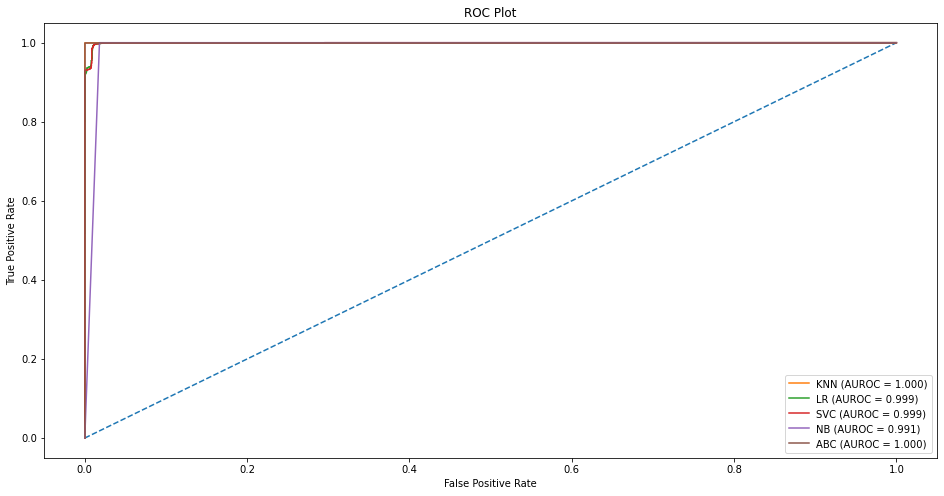

In [34]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)
plt.plot(mlp_fpr, mlp_tpr, label='ABC (AUROC = %0.3f)' % mlp_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [19]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (42,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2752      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
1041/1041 [==============================] - 1s 513us/step - loss: 0.1860 - accuracy: 0.9141
Epoch 2/50
1041/1041 [==============================] - 1s 500us/step - loss: 0.0867 - accuracy: 0.9673
Epoch 3/50
1041/1041 [==============================] - 1s 491us/step - loss: 0.0408 - accuracy: 0.9877
Epoch 4/50
1041/1041 [==============================] - 0s 478us/step - loss: 0.0193 - accuracy: 0.9952
Epoch 5/50
1041/1041 [==============================] - 0s 480us/step - loss: 0.0103 - accuracy: 0.9975
Epoch 6/50
1041/1041 [==============================] - 0s 472us/step - loss: 0.0058 - accuracy: 0.9988
Epoch 7/50
1041/1041 [==============================] - 0s 475us/step - loss: 0.0045 - accuracy: 0.9988
Epoch 8/50
1041/1041 [==============================] - 0s 473us/step - loss: 0.0036 - accuracy: 0.9992
Epoch 9/50
1041/1041 [==============================] - 0s 478us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 10/50
1041/1041 [==============================] - 1s 500u

In [22]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7972

    accuracy                           1.00     15608
   macro avg       1.00      1.00      1.00     15608
weighted avg       1.00      1.00      1.00     15608



Text(0.5, 1.0, 'Loss and Accuracy plot')

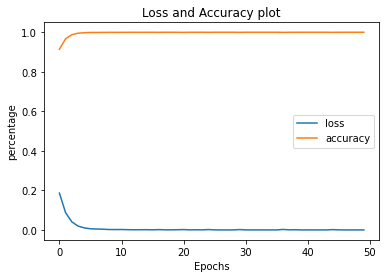

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

## DBScan

In [13]:
df = pd.read_csv("unsw_dbscan2.csv")

In [14]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.900000,0.0,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
1,0.900000,0.0,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
2,0.900000,0.0,0.6,0.004255,0.000000,0.348294,0.000000,0.999320,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.020408,0.017857,0.0,0.666667,0
3,0.046154,0.0,0.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.03125,0.017857,0.0,0.0,0.0,0.020408,0.017857,1.0,0.666667,0
4,0.046154,0.0,0.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.03125,0.017857,0.0,0.0,0.0,0.020408,0.017857,1.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35610,0.853846,0.0,0.4,0.155355,0.144993,0.461602,0.781941,0.912327,0.444444,0.166667,...,0.00000,0.000000,0.0,0.0,0.0,0.016011,0.188733,0.0,0.666667,0
35611,0.853846,0.0,0.8,0.038298,0.000000,0.050491,0.000000,0.004489,0.888889,0.000000,...,0.03125,0.428571,0.0,0.0,0.0,0.428571,0.428571,0.0,0.666667,0
35612,0.853846,0.0,0.4,0.055319,0.063025,0.281440,0.232378,0.876125,0.444444,0.166667,...,0.00000,0.039355,0.0,0.0,0.0,0.050177,0.134101,0.0,0.666667,0
35613,0.853846,0.0,0.4,0.136957,0.129784,0.423802,0.736695,0.979109,0.444444,0.166667,...,0.00000,0.000000,0.0,0.0,0.0,0.038544,0.130290,0.0,0.666667,0


In [15]:
X = df.drop('label', axis=1)
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((28492, 42), (28492,))

### Apply ML

In [17]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [18]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 99.93
Testing  Accuracy: 99.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3908
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      7123
   macro avg       1.00      1.00      1.00      7123
weighted avg       1.00      1.00      1.00      7123



In [30]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_train,y_train,X_test,y_test)
print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9077
           1       1.00      1.00      1.00      8993

    accuracy                           1.00     18070
   macro avg       1.00      1.00      1.00     18070
weighted avg       1.00      1.00      1.00     18070



In [19]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 99.64
Testing  Accuracy: 99.63
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3908
           1       0.99      1.00      1.00      3215

    accuracy                           1.00      7123
   macro avg       1.00      1.00      1.00      7123
weighted avg       1.00      1.00      1.00      7123



In [32]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9077
           1       1.00      1.00      1.00      8993

    accuracy                           1.00     18070
   macro avg       1.00      1.00      1.00     18070
weighted avg       1.00      1.00      1.00     18070



In [33]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9077
           1       1.00      1.00      1.00      8993

    accuracy                           1.00     18070
   macro avg       1.00      1.00      1.00     18070
weighted avg       1.00      1.00      1.00     18070



In [20]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 99.64
Testing  Accuracy: 99.63
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3908
           1       0.99      1.00      1.00      3215

    accuracy                           1.00      7123
   macro avg       1.00      1.00      1.00      7123
weighted avg       1.00      1.00      1.00      7123



In [35]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

[15:23:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9077
           1       1.00      1.00      1.00      8993

    accuracy                           1.00     18070
   macro avg       1.00      1.00      1.00     18070
weighted avg       1.00      1.00      1.00     18070



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [21]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.91
Testing  Accuracy: 99.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3908
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      7123
   macro avg       1.00      1.00      1.00      7123
weighted avg       1.00      1.00      1.00      7123



In [22]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 99.64
Testing  Accuracy: 99.63
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3908
           1       0.99      1.00      1.00      3215

    accuracy                           1.00      7123
   macro avg       1.00      1.00      1.00      7123
weighted avg       1.00      1.00      1.00      7123



In [38]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
RF_probs = rf.predict_proba(X_test)
GBC_probs = gbc.predict_proba(X_test)
ADA_probs = ada.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
ADA_probs = ADA_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
ADA_auc = roc_auc_score(y_test, ADA_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(y_test, ADA_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

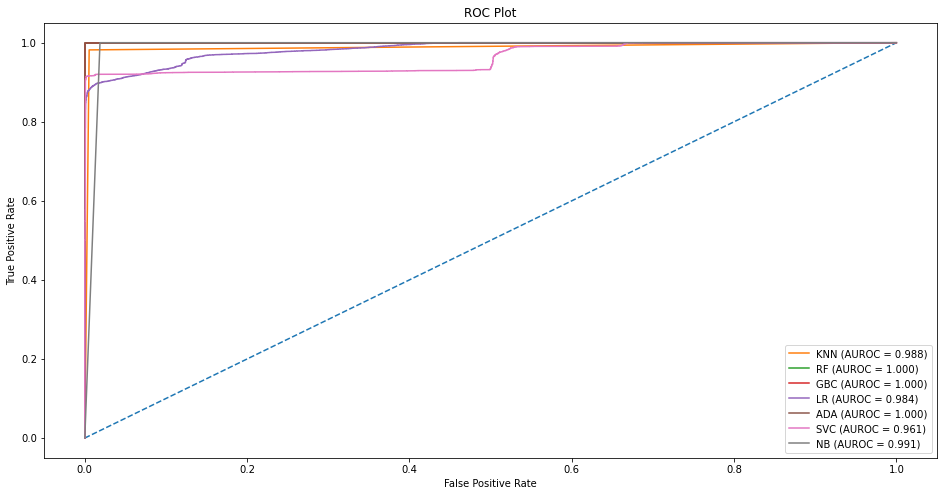

In [39]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(ADA_fpr, ADA_tpr, label='ADA (AUROC = %0.3f)' % ADA_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [40]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (42,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
1205/1205 [==============================] - 1s 477us/step - loss: 0.1719 - accuracy: 0.9239
Epoch 2/50
1205/1205 [==============================] - 1s 451us/step - loss: 0.0734 - accuracy: 0.9729
Epoch 3/50
1205/1205 [==============================] - 1s 445us/step - loss: 0.0299 - accuracy: 0.9916
Epoch 4/50
1205/1205 [==============================] - 1s 442us/step - loss: 0.0111 - accuracy: 0.9974
Epoch 5/50
1205/1205 [==============================] - 1s 449us/step - loss: 0.0058 - accuracy: 0.9985
Epoch 6/50
1205/1205 [==============================] - 1s 483us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 7/50
1205/1205 [==============================] - 1s 478us/step - loss: 0.0023 - accuracy: 0.9996
Epoch 8/50
1205/1205 [==============================] - 1s 470us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/50
1205/1205 [==============================] - 1s 473us/step - loss: 0.0011 - accuracy: 0.9998
Epoch 10/50
1205/1205 [==============================] - 1s 562u

In [42]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9077
           1       1.00      1.00      1.00      8993

    accuracy                           1.00     18070
   macro avg       1.00      1.00      1.00     18070
weighted avg       1.00      1.00      1.00     18070



Text(0.5, 1.0, 'Loss and Accuracy plot')

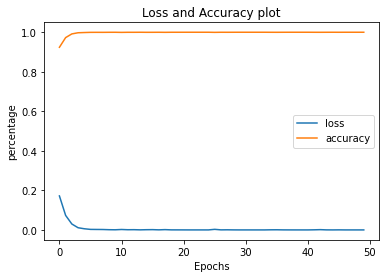

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

## KMeans

In [3]:
df = pd.read_csv("unsw_kmeans2.csv")

In [4]:
df

,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.900000,0.0,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
1,0.900000,0.0,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667,0
2,0.900000,0.0,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667,0
3,0.900000,0.0,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,0.000000,...,0.00000,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667,0
4,0.900000,0.0,0.6,0.004255,0.000000,0.117345,0.000000,0.999728,0.888889,0.000000,...,0.00000,0.017857,0.0,0.0,0.0,0.020408,0.017857,0.0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43545,0.853846,0.0,0.8,0.038298,0.000000,0.050491,0.000000,0.004489,0.888889,0.000000,...,0.03125,0.428571,0.0,0.0,0.0,0.428571,0.428571,0.0,0.666667,0
43546,0.853846,0.0,0.4,0.141755,0.137625,0.411463,0.446894,0.292001,0.444444,0.166667,...,0.00000,0.012878,0.0,0.0,0.0,0.042485,0.095725,0.0,0.666667,0
43547,0.853846,0.0,0.4,0.055319,0.063025,0.281440,0.232378,0.876125,0.444444,0.166667,...,0.00000,0.039355,0.0,0.0,0.0,0.050177,0.134101,0.0,0.666667,0
43548,0.853846,0.0,0.4,0.136957,0.129784,0.423802,0.736695,0.979109,0.444444,0.166667,...,0.00000,0.000000,0.0,0.0,0.0,0.038544,0.130290,0.0,0.666667,0


In [5]:
X = df.drop('label', axis=1)
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((34840, 42), (34840,))

### Apply ML

In [7]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [8]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=100)
knneig.fit(X_train, y_train)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 98.83
Testing  Accuracy: 98.82
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4273
           1       0.99      0.98      0.99      4437

    accuracy                           0.99      8710
   macro avg       0.99      0.99      0.99      8710
weighted avg       0.99      0.99      0.99      8710



In [50]:
# #RF

# rf = RandomForestClassifier(n_estimators=250, random_state = 42)
# predict(rf,X_train,y_train,X_test,y_test)
# print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8739
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



In [9]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 98.22
Testing  Accuracy: 98.42
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4273
           1       0.98      0.99      0.98      4437

    accuracy                           0.98      8710
   macro avg       0.98      0.98      0.98      8710
weighted avg       0.98      0.98      0.98      8710



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8739
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



In [53]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8739
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



In [10]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 96.7
Testing  Accuracy: 97.21
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4273
           1       0.95      1.00      0.97      4437

    accuracy                           0.97      8710
   macro avg       0.97      0.97      0.97      8710
weighted avg       0.97      0.97      0.97      8710



In [55]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

[16:49:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8739
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [11]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 99.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4273
           1       1.00      1.00      1.00      4437

    accuracy                           1.00      8710
   macro avg       1.00      1.00      1.00      8710
weighted avg       1.00      1.00      1.00      8710



In [12]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 98.46
Testing  Accuracy: 98.58
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4273
           1       0.99      0.99      0.99      4437

    accuracy                           0.99      8710
   macro avg       0.99      0.99      0.99      8710
weighted avg       0.99      0.99      0.99      8710



In [58]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
LR_probs = LR_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]
mlp_probs = mlp_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
ADA_auc = roc_auc_score(y_test, ADA_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(y_test, ADA_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

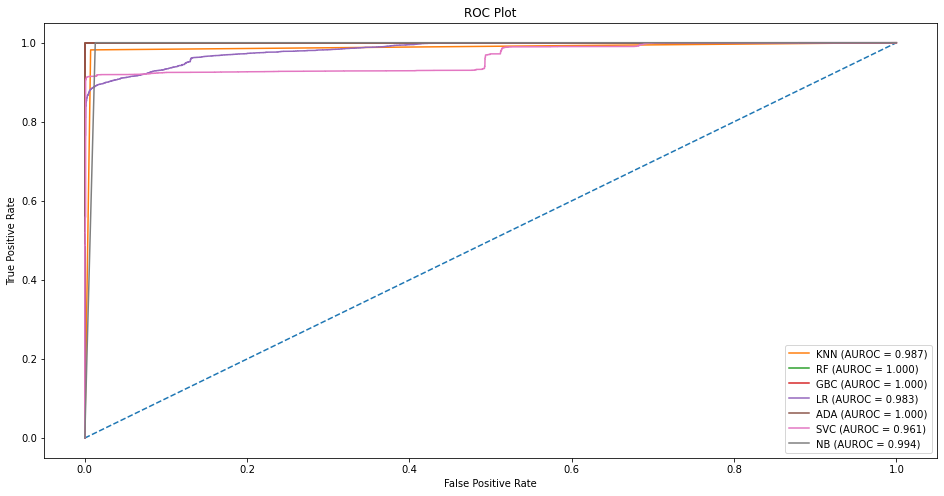

In [59]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(ADA_fpr, ADA_tpr, label='ADA (AUROC = %0.3f)' % ADA_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [60]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (42,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train,y_train,epochs=50,batch_size=60)

Epoch 1/50
1172/1172 [==============================] - 1s 456us/step - loss: 0.1767 - accuracy: 0.9216
Epoch 2/50
1172/1172 [==============================] - 1s 458us/step - loss: 0.0927 - accuracy: 0.9638
Epoch 3/50
1172/1172 [==============================] - 1s 451us/step - loss: 0.0366 - accuracy: 0.9898
Epoch 4/50
1172/1172 [==============================] - 1s 458us/step - loss: 0.0127 - accuracy: 0.9975
Epoch 5/50
1172/1172 [==============================] - 1s 452us/step - loss: 0.0058 - accuracy: 0.9989
Epoch 6/50
1172/1172 [==============================] - 1s 456us/step - loss: 0.0031 - accuracy: 0.9995
Epoch 7/50
1172/1172 [==============================] - 1s 458us/step - loss: 0.0021 - accuracy: 0.9996
Epoch 8/50
1172/1172 [==============================] - 1s 459us/step - loss: 0.0012 - accuracy: 0.9998
Epoch 9/50
1172/1172 [==============================] - 1s 460us/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/50
1172/1172 [==============================] - 1s 457u

In [62]:
y_pred=model.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8739
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



Text(0.5, 1.0, 'Loss and Accuracy plot')

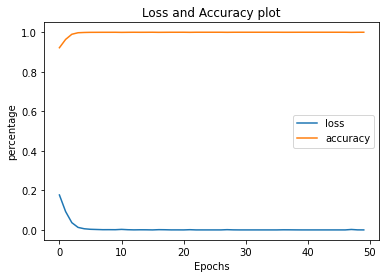

In [63]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')